# Fake news Detection

In [5]:
import pandas as pd #to manipulate datafram
import numpy as np #to peform mathematical operations
import seaborn as sns #to divide dat into traimimg and testing
import matplotlib.pyplot as plt #to plot
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
#to remove special charcters
import re
import string

In [6]:
#reading both csv files
df_fake = pd.read_csv("Fake.csv")
df_true = pd.read_csv("True.csv")

In [7]:
df_fake.head(5)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [8]:
df_true.head(5)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [9]:
#labelling fake news as 0 and true news a 1
df_fake["class"] = 0
df_true["class"] = 1

In [10]:
df_fake.shape, df_true.shape

((23481, 5), (21417, 5))

In [11]:
#removing last 10 rows from true and fake csv file
df_fake_manual_testing = df_fake.tail(10)
for i in range(23480,23470,-1):
    df_fake.drop([i], axis = 0, inplace = True)
df_true_manual_testing = df_true.tail(10)
for i in range(21416,21406,-1):
    df_true.drop([i], axis = 0, inplace = True)

In [12]:
df_fake.shape, df_true.shape

((23471, 5), (21407, 5))

In [13]:
#labelling fake news as 0 and true news a 1
df_fake_manual_testing["class"] = 0
df_true_manual_testing["class"] = 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
df_fake_manual_testing.head(10)

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [15]:
df_true_manual_testing.head(10)

,title,text,subject,date,class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


In [16]:
df_manual_testing = pd.concat([df_fake_manual_testing,df_true_manual_testing], axis = 0)
df_manual_testing.to_csv("manual_testing.csv")

In [17]:
#merging last 1ro rows and saving it as csv
df_marge = pd.concat([df_fake, df_true], axis =0 )
df_marge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [18]:
df_marge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [19]:
#remove unnecessaryt columns
df = df_marge.drop(["title", "subject","date"], axis = 1)

In [20]:
#checking if data contains null value
df.isnull().sum()

text     0
class    0
dtype: int64

In [21]:
#shuffling dataset
df = df.sample(frac = 1)

In [22]:
df.head()

,text,class
15104,VATICAN CITY (Reuters) - Pope Francis appeared...,1
8809,MADRID (Reuters) - U.S. President Barack Obama...,1
14685,LONDON (Reuters) - The final death toll from t...,1
12076,BERLIN (Reuters) - Germany s Social Democrats ...,1
18964,YANGON (Reuters) - Myanmar is committing crime...,1


In [23]:
df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)

In [24]:
df.columns

Index(['text', 'class'], dtype='object')

In [25]:
df.head()

,text,class
0,VATICAN CITY (Reuters) - Pope Francis appeared...,1
1,MADRID (Reuters) - U.S. President Barack Obama...,1
2,LONDON (Reuters) - The final death toll from t...,1
3,BERLIN (Reuters) - Germany s Social Democrats ...,1
4,YANGON (Reuters) - Myanmar is committing crime...,1


In [26]:
#Regex function for pre procesing
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [27]:
#applying regex for preprocesssing
df["text"] = df["text"].apply(wordopt)

In [28]:
#depende dependent and independent variables
x = df["text"]
y = df["class"]

In [29]:
#splitting data into train test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [31]:
#to vectorize, represents in vector forn
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [32]:
#Logistic Regression
#Importing libraries to implement logistic regression
from sklearn.linear_model import LogisticRegression

In [33]:
LR = LogisticRegression()
#calling fit method to train the model
LR.fit(xv_train,y_train)

LogisticRegression()

In [34]:
!pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [35]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.svm import SVC

In [36]:
pred_lr=LR.predict(xv_test)

In [37]:
#accuracty of the model
LR.score(xv_test, y_test)

0.9860071301247771

In [38]:
#to print summary of model
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5829
           1       0.98      0.99      0.99      5391

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



37710    0
30346    1
40251    0
43820    0
23702    0
        ..
35189    1
17342    0
14478    1
22816    0
36338    1
Name: class, Length: 11220, dtype: int64
[0 1 0 ... 1 0 1]


(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f41f9994a50>)

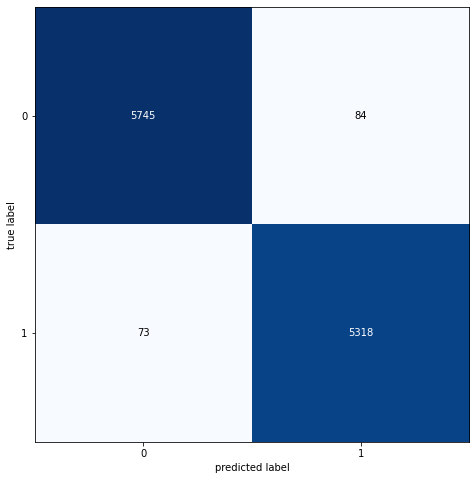

In [39]:
print(y_test)
print(pred_lr)
mat = confusion_matrix(y_test, pred_lr)
plot_confusion_matrix(conf_mat=mat, figsize=(8, 8))

In [40]:
#Decision tree classification
from sklearn.tree import DecisionTreeClassifier #importing libraries for decision trees

In [41]:
DT = DecisionTreeClassifier()
#training decision tree model
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [42]:
pred_dt = DT.predict(xv_test)

In [43]:
#accuracy of decision tree
DT.score(xv_test, y_test)

0.9953654188948307

In [44]:
#report of Decision TRee classification
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5829
           1       1.00      0.99      1.00      5391

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



37710    0
30346    1
40251    0
43820    0
23702    0
        ..
35189    1
17342    0
14478    1
22816    0
36338    1
Name: class, Length: 11220, dtype: int64
[0 1 0 ... 1 0 1]


(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f41f970e6d0>)

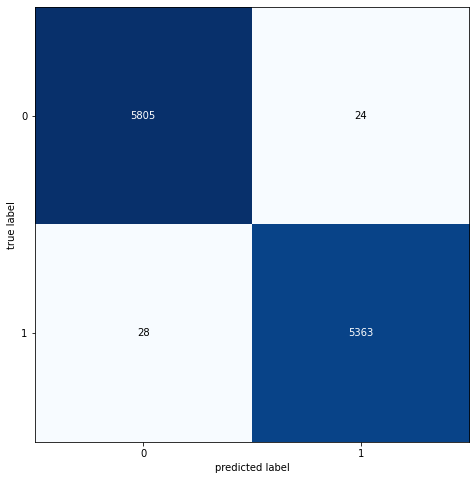

In [45]:
print(y_test)
print(pred_dt)
mat = confusion_matrix(y_test, pred_dt)
plot_confusion_matrix(conf_mat=mat, figsize=(8, 8))

In [46]:
#Gradient Boosting classifier
from sklearn.ensemble import GradientBoostingClassifier #importing libraries for gradient boosting

In [47]:
GBC = GradientBoostingClassifier(random_state=0)
#training model
GBC.fit(xv_train, y_train)

GradientBoostingClassifier(random_state=0)

In [48]:
pred_gbc = GBC.predict(xv_test)

In [49]:
#accuracy of the model
GBC.score(xv_test, y_test)

0.995632798573975

In [50]:
##gradient boosting classification report
print(classification_report(y_test, pred_gbc))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5829
           1       0.99      1.00      1.00      5391

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



37710    0
30346    1
40251    0
43820    0
23702    0
        ..
35189    1
17342    0
14478    1
22816    0
36338    1
Name: class, Length: 11220, dtype: int64
[0 1 0 ... 1 0 1]


(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f41f9196e90>)

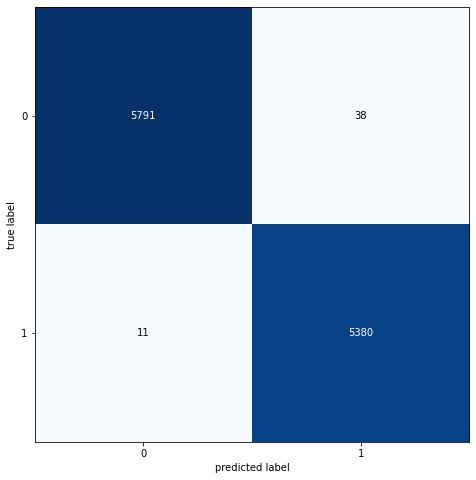

In [51]:
print(y_test)
print(pred_gbc)
mat = confusion_matrix(y_test, pred_gbc)
plot_confusion_matrix(conf_mat=mat, figsize=(8, 8))

In [52]:
#Random Forest classifier
from sklearn.ensemble import RandomForestClassifier #importing libraries for random forest

In [53]:
RFC = RandomForestClassifier(random_state=0)
#training model
RFC.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [54]:
pred_rfc = RFC.predict(xv_test)

In [55]:
#accuracy of the model
RFC.score(xv_test, y_test)

0.9883244206773618

In [56]:
##classification report
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5829
           1       0.99      0.99      0.99      5391

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



37710    0
30346    1
40251    0
43820    0
23702    0
        ..
35189    1
17342    0
14478    1
22816    0
36338    1
Name: class, Length: 11220, dtype: int64
[0 1 0 ... 1 0 1]


(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f41f907a990>)

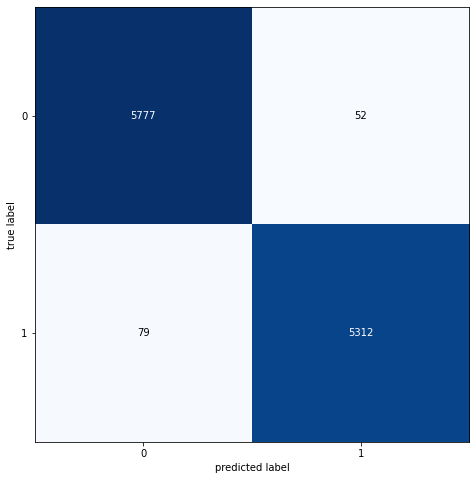

In [57]:
print(y_test)
print(pred_rfc)
mat = confusion_matrix(y_test, pred_rfc)
plot_confusion_matrix(conf_mat=mat, figsize=(8, 8))

In [58]:
#testing accuracy prediction by manual input from user
def output_lable(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not A Fake News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_GBC = GBC.predict(new_xv_test)
    pred_RFC = RFC.predict(new_xv_test)

    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction: {}".format(output_lable(pred_LR[0]), 
                                                                                                              output_lable(pred_DT[0]), 
                                                                                                              output_lable(pred_GBC[0]), 
                                                                                                              output_lable(pred_RFC[0])))

In [59]:
news = str(input())
manual_testing(news)

KeyboardInterrupt: ignored